<a href="https://colab.research.google.com/github/RD191295/Stock-Market-Prediction-/blob/main/Stock_Market_Prediction_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import seaborn as sns
sns.set()

In [ ]:
start = "2013-01-01"
end =  "2022-10-01"

# let us get data from yahoo finance
yf.pdr_override()
stock_data = pdr.get_data_yahoo("AAPL", start=start, end = end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.890793,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.677599,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.213049,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.117676,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.161058,458707200


In [ ]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-26,149.660004,153.770004,149.639999,150.770004,150.770004,93339400
2022-09-27,152.740005,154.720001,149.949997,151.759995,151.759995,84442700
2022-09-28,147.639999,150.639999,144.839996,149.839996,149.839996,146691400
2022-09-29,146.100006,146.720001,140.679993,142.479996,142.479996,128138200
2022-09-30,141.279999,143.100006,138.000000,138.199997,138.199997,124705400


In [ ]:
stock_data = stock_data.reset_index()

In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.890793,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.677599,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.213049,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.117676,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.161058,458707200


In [ ]:
stock_data_new = stock_data.drop(["Date","Adj Close"], axis = 1)

In [ ]:
stock_data_new.head()

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200


In [ ]:
stock_data_new.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
ma100 = stock_data_new.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2450    151.9792
2451    151.8366
2452    151.7673
2453    151.6193
2454    151.4807
Name: Close, Length: 2455, dtype: float64

Text(0.5, 1.0, 'Date vs Price of stock')

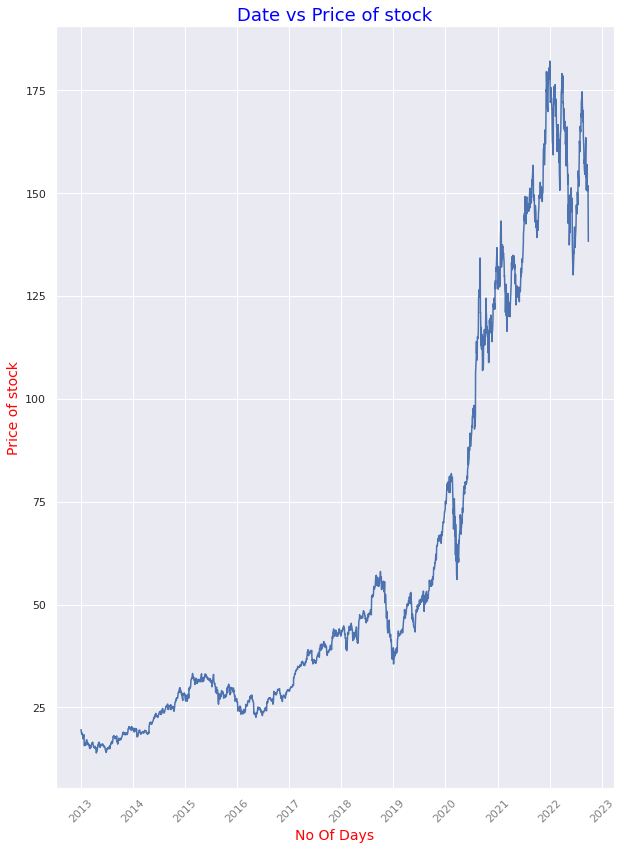

In [ ]:
# Ploting Date wise Closing
plt.figure(figsize = (10,14))
plt.plot(stock_data["Date"],stock_data["Close"])
plt.xticks(rotation = 45,color = "gray")
plt.xlabel("No Of Days", color = "red",fontsize = 14)
plt.ylabel("Price of stock",color = "red",fontsize = 14)
plt.title("Date vs Price of stock",color = "blue",fontsize = 18)

Text(0.5, 1.0, 'Date vs Price of stock')

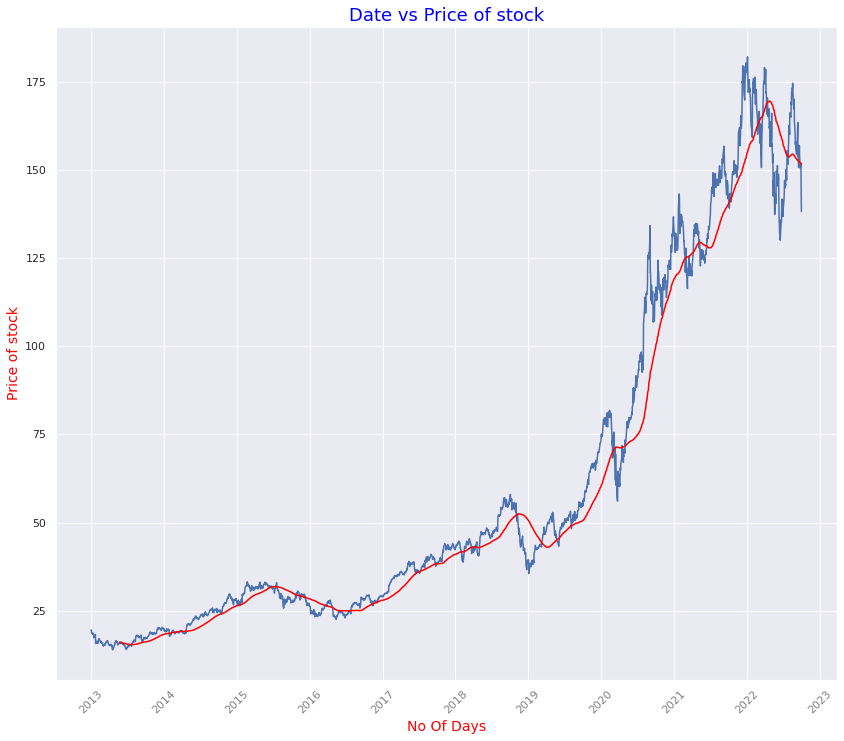

In [ ]:
# Ploting Date wise Closing
plt.figure(figsize = (14,12))
plt.plot(stock_data["Date"],stock_data["Close"])
plt.plot(stock_data["Date"],ma100,color = "red")
plt.xticks(rotation = 45,color = "gray")
plt.xlabel("No Of Days", color = "red",fontsize = 14)
plt.ylabel("Price of stock",color = "red",fontsize = 14)
plt.title("Date vs Price of stock",color = "blue",fontsize = 18)

In [ ]:
ma200 = stock_data_new.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2450    160.47065
2451    160.35665
2452    160.20860
2453    160.04230
2454    159.86165
Name: Close, Length: 2455, dtype: float64

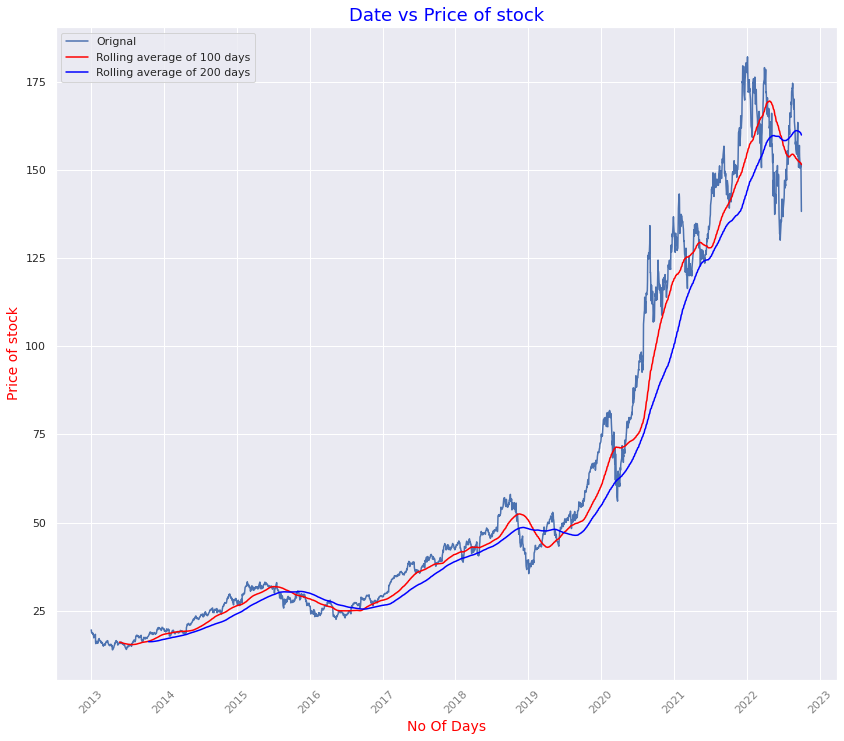

In [ ]:
# Ploting Date wise Closing
plt.figure(figsize = (14,12))
plt.plot(stock_data["Date"],stock_data["Close"])
plt.plot(stock_data["Date"],ma100,color = "red")
plt.plot(stock_data["Date"],ma200,color = "blue")

plt.xticks(rotation = 45,color = "gray")
plt.xlabel("No Of Days", color = "red",fontsize = 14)
plt.ylabel("Price of stock",color = "red",fontsize = 14)
plt.title("Date vs Price of stock",color = "blue",fontsize = 18)
plt.legend(["Orignal","Rolling average of 100 days","Rolling average of 200 days" ])

In [ ]:
# splitting data into training and testing

data_training = pd.DataFrame(stock_data_new["Close"][0:int(len(stock_data_new) * 0.70)])
data_testing = pd.DataFrame(stock_data_new["Close"][int(len(stock_data_new) * 0.70):int(len(stock_data_new))])

data_training.shape , data_testing.shape

((1718, 1), (737, 1))

In [ ]:
data_training.head()

,Close
0,19.608213
1,19.360714
2,18.821428
3,18.710714
4,18.761070


In [ ]:
data_testing.head()

,Close
1718,60.822498
1719,60.814999
1720,62.189999
1721,63.955002
1722,64.375000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.11716264],
       [0.11204002],
       [0.10087815],
       ...,
       [0.97169615],
       [0.98721928],
       [1.        ]])

In [ ]:
X_train = []
Y_train = []

for i in range(100, data_training_array.shape[0]):
  X_train.append(data_training_array[i-100:i])
  Y_train.append(data_training_array[i, 0])


X_train,Y_train =  np.array(X_train) , np.array(Y_train)

In [ ]:
X_train.shape , Y_train.shape

((1618, 100, 1), (1618,))

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 512, activation = "relu", return_sequences=  True,
               input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 256, activation = "relu", return_sequences = True))
model.add(Dropout(0.1))

model.add(LSTM(units = 128, activation = "relu", return_sequences = True))
model.add(Dropout(0.1))

model.add(LSTM(units = 64, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 512)          1052672   
                                                                 
 dropout_4 (Dropout)         (None, 100, 512)          0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 256)          787456    
                                                                 
 dropout_5 (Dropout)         (None, 100, 256)          0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 128)          197120    
                                                                 
 dropout_6 (Dropout)         (None, 100, 128)          0         
                                                                 
 lstm_7 (LSTM)               (None, 64)               

In [ ]:
model.compile(optimizer = "adam",
              loss = "mean_squared_error",
              metrics = "mae")

In [ ]:
model.fit(X_train, Y_train , epochs = 50)

Epoch 1/50
51/51 [==============================] - 44s 780ms/step - loss: 0.0244 - mae: 0.0964
Epoch 2/50
51/51 [==============================] - 42s 831ms/step - loss: 0.0060 - mae: 0.0554
Epoch 3/50
51/51 [==============================] - 42s 806ms/step - loss: 0.0045 - mae: 0.0474
Epoch 4/50
51/51 [==============================] - 40s 787ms/step - loss: 0.0040 - mae: 0.0451
Epoch 5/50
51/51 [==============================] - 39s 774ms/step - loss: 0.0040 - mae: 0.0452
Epoch 6/50
51/51 [==============================] - 40s 781ms/step - loss: 0.0047 - mae: 0.0495
Epoch 7/50
51/51 [==============================] - 40s 787ms/step - loss: 0.0035 - mae: 0.0423
Epoch 8/50
51/51 [==============================] - 40s 786ms/step - loss: 0.0037 - mae: 0.0440
Epoch 9/50
51/51 [==============================] - 40s 786ms/step - loss: 0.0038 - mae: 0.0446
Epoch 10/50
51/51 [==============================] - 40s 781ms/step - loss: 0.0027 - mae: 0.0377
Epoch 11/50
51/51 [====================

In [ ]:
model.save("stock_model.h5")

In [ ]:
data_testing.head()

,Close
1718,60.822498
1719,60.814999
1720,62.189999
1721,63.955002
1722,64.375000


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing,ignore_index = True)
final_df.head()

,Close
0,47.537498
1,48.145000
2,48.702499
3,48.547501
4,48.537498


In [ ]:
input_test_data = scaler.fit_transform(final_df)
input_test_data

In [ ]:
X_test = []
Y_test = []

for i in range(100, input_test_data.shape[0]):
  X_test.append(input_test_data[i-100:i])
  Y_test.append(input_test_data[i, 0])


X_test,Y_test =  np.array(X_test) , np.array(Y_test)

In [ ]:
X_test.shape,Y_test.shape


((737, 100, 1), (737,))

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
scale_factor = 1/ scaler.scale_
y_predicted = y_predicted * scale_factor
Y_test = Y_test * scale_factor

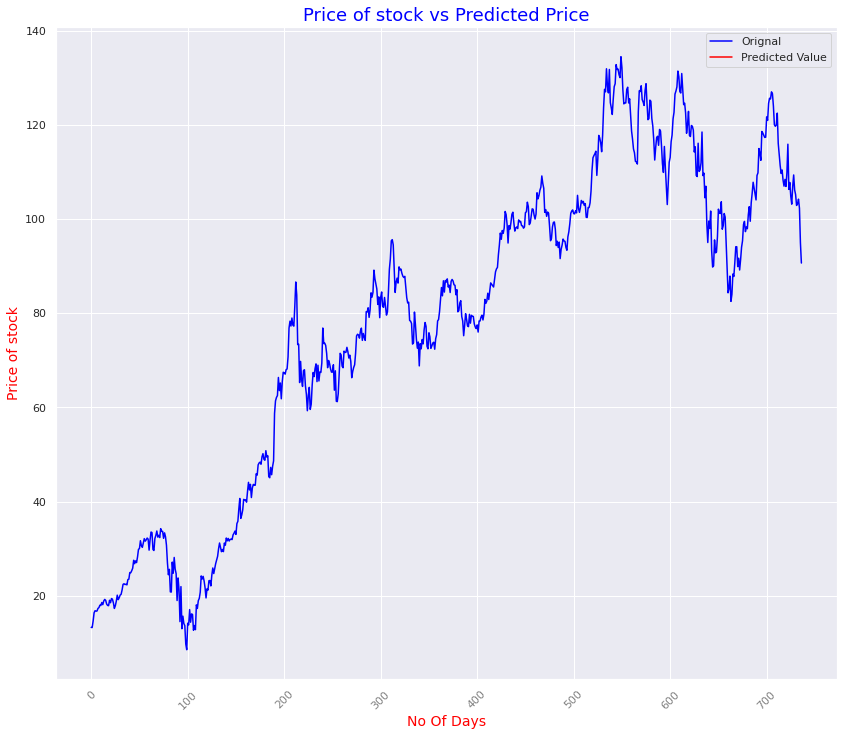

In [ ]:
# Ploting Date wise Closing
plt.figure(figsize = (14,12))
plt.plot(Y_test,color ="blue", label = "Orignal value")
plt.plot(y_predicted,color = "red", label = "Predicted Value")

plt.xticks(rotation = 45,color = "gray")
plt.xlabel("No Of Days", color = "red",fontsize = 14)
plt.ylabel("Price of stock",color = "red",fontsize = 14)
plt.title("Price of stock vs Predicted Price",color = "blue",fontsize = 18)
plt.legend(["Orignal","Predicted Value"])